# TODO: UPLOAD DATA FOLDER TO DRIVE AND MAKE THIS NOTEBOOK INSTALL THAT
# Setup Data
For the other notebooks, its important the data directory is initialised correctly. This notebook makes sure all the data is in the right spot. E.g. it generates the db pickle files necessary throughout the notebooks.

## Imports

In [1]:
import os, sys

# if colab, mount drive and get the git repo
if 'google.colab' in sys.modules:
    from google.colab import drive
    print(os.getcwd())
    drive.mount('/content/drive')
    !git clone --recurse-submodules https://github.com/jsluijter02/LightSB_YOLO

    # Append LightSB_YOLO path
    sys.path.append(os.path.join(os.getcwd(), 'LightSB_YOLO'))

    ## TODO: 

# otherwise local path append
else:
    sys.path.append(os.path.dirname(os.getcwd()))

In [2]:
from scripts.utils import dirs
from scripts.dataset import bdd
from scripts.utils import datacheck

dirs.add_YOLOPX_to_PATH()
from lib.config import cfg

import numpy as np
np.random.seed(0)

/opt/anaconda3/envs/lightsb_yolo/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/anaconda3/envs/lightsb_yolo/lib/python3.8/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 2.0.8 (you have 1.4.18). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


## Assert Data Directory

In [3]:
# make sure the data is downloaded and on the right place.
# Data must be in LightSB_YOLO/data
data_dir = dirs.get_data_dir()
print(data_dir)

assert(os.path.exists(data_dir))

data_dir_list = os.listdir(data_dir)

# Make sure everything that would cost a bunch of time to generate is 
# in the dataa folder
assert('bdd' in data_dir_list)
assert('encodings' in data_dir_list)
assert('weights' in data_dir_list)

/Users/jochem/Documents/GitHub/LightSB_YOLO/data


### Print a Few Example Pictures

In [4]:
from scripts.utils import img

/Users/jochem/Documents/GitHub/LightSB_YOLO/data/images
/Users/jochem/Documents/GitHub/LightSB_YOLO/data/images/train
/Users/jochem/Documents/GitHub/LightSB_YOLO/data/images/val
Num train imgs:  70000
Num val images:  10000


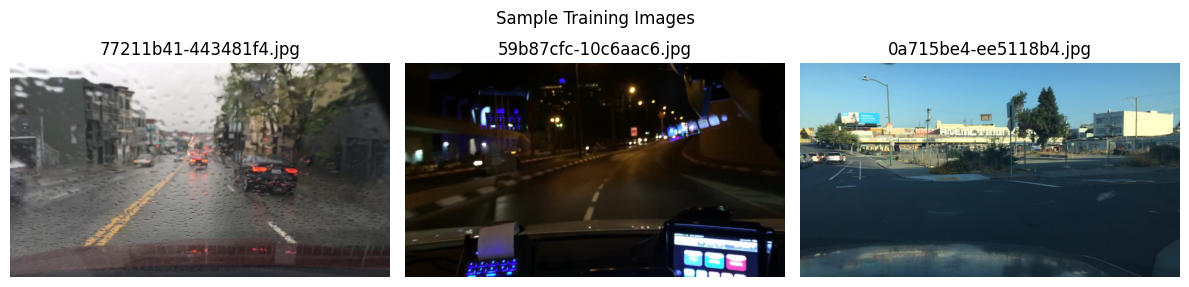

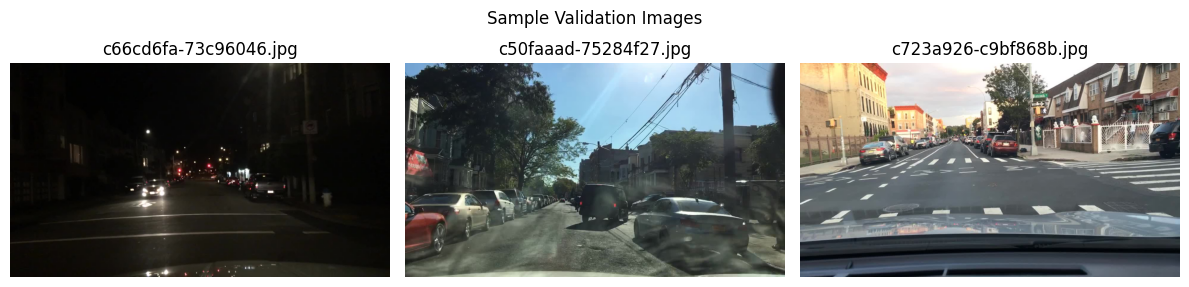

In [6]:
bdd_images = os.path.join(data_dir, "images")
train_images = os.path.join(bdd_images, "train")
val_images = os.path.join(bdd_images, "val")

print(bdd_images)
assert(os.path.exists(bdd_images))
print(train_images)
assert(os.path.exists(train_images))
print(val_images)
assert(os.path.exists(val_images))

train_list = os.listdir(train_images)
print("Num train imgs: ", len(train_list))
val_list = os.listdir(val_images)
print("Num val images: ", len(val_list))

assert(".DS_Store" not in train_list)
assert(".DS_Store" not in val_list)

sample_indices_train = img.sample_indices(train_list, 3)
train_samples = img.load_imgs(train_images, sample_indices_train)
img.plot_samples(train_samples, title="Sample Training Images", labels=sample_indices_train, square = False)

sample_indices_val = img.sample_indices(val_list, 3)
val_samples = img.load_imgs(val_images, sample_indices_val)
img.plot_samples(val_samples, title="Sample Validation Images", labels=sample_indices_val, square = False)

## Generate DB Pickle Files

In [6]:
pkl_path = os.path.join(data_dir, "pkl_files")

# generate the train db
bdd.generate_bdd_db_pickles(cfg, is_train=True)

# val
bdd.generate_bdd_db_pickles(cfg, is_train=False)

assert(os.path.exists(os.path.join(pkl_path, "full_train_dataset.pkl")))
assert(os.path.exists(os.path.join(pkl_path, "full_val_dataset.pkl")))

building database...


100%|██████████| 70000/70000 [01:04<00:00, 1077.52it/s]


database build finish
building database...


100%|██████████| 10000/10000 [00:08<00:00, 1129.26it/s]


database build finish


## Get and check timeofday

In [7]:
train_day = bdd.get_db(cfg, is_train=True, timeofday="daytime")
train_night= bdd.get_db(cfg, is_train=True, timeofday="night")

val_day = bdd.get_db(cfg, is_train=False, timeofday="daytime")
val_night = bdd.get_db(cfg, is_train=False, timeofday="night")

print("Number of train_day: ", len(train_day))
print("Number of train_night: ", len(train_night))
print("Number of val_day: ", len(val_day))
print("Number of val_night: ", len(val_night))

Number of train_day:  36800
Number of train_night:  28028
Number of val_day:  5258
Number of val_night:  3929


## Validate Data
### Check ID's for labels, LightSB images, Clahe Images, BDD images
Empty sets and empty arrays = GOOD

### 1: BDD images and generated .txt labels

In [8]:
bdd_train_dir = os.path.join(dirs.get_data_dir(), 'images', 'train')
label_train_dir = os.path.join(dirs.get_data_dir(), 'labels', 'train')
datacheck.check_directories(bdd_train_dir, label_train_dir)

bdd_val_dir = os.path.join(dirs.get_data_dir(), 'images', 'val')
label_val_dir = os.path.join(dirs.get_data_dir(), 'labels', 'val')
datacheck.check_directories(bdd_val_dir, label_val_dir)

Difference:  set()
Difference:  set()


set()

### 2: BDD images and CLAHE Images

In [9]:
bdd_val_dir = os.path.join(dirs.get_data_dir(), 'images', 'val')
clip1_dir = os.path.join(dirs.get_data_dir(), 'images_CLAHE', 'clip_limit_1')
clip2_dir = os.path.join(dirs.get_data_dir(), 'images_CLAHE', 'clip_limit_2')
clip3_dir = os.path.join(dirs.get_data_dir(), 'images_CLAHE', 'clip_limit_3')

datacheck.check_directories(bdd_val_dir, clip1_dir)
datacheck.check_directories(bdd_val_dir, clip2_dir)
datacheck.check_directories(bdd_val_dir, clip3_dir)

Difference:  set()
Difference:  set()
Difference:  set()


set()

### 3: BDD images and LightSB images

In [10]:
bdd_val_dir = os.path.join(dirs.get_data_dir(), 'images', 'val')
lightsb_dir = os.path.join(dirs.get_data_dir(), 'images_LightSB')

datacheck.check_directories(bdd_val_dir, clip1_dir)

Difference:  set()


set()

### 4: Clahe Image Size

In [11]:
clip1_dir = os.path.join(dirs.get_data_dir(), 'images_CLAHE', 'clip_limit_1')
clip2_dir = os.path.join(dirs.get_data_dir(), 'images_CLAHE', 'clip_limit_2')
clip3_dir = os.path.join(dirs.get_data_dir(), 'images_CLAHE', 'clip_limit_3')

datacheck.check_image_sizes(clip1_dir)
datacheck.check_image_sizes(clip2_dir)
datacheck.check_image_sizes(clip3_dir)

[]
[]
[]


### 5: Check LightSB Image Size

In [13]:
lightsb_dir = os.path.join(dirs.get_data_dir(), 'images_LightSB', 'val')
datacheck.check_image_sizes(lightsb_dir)

[]


### 6: AUTOKL Image Size and Existance

In [14]:
bdd_val_dir = os.path.join(dirs.get_data_dir(), 'images', 'val')
autokl_dir = os.path.join(dirs.get_data_dir(), 'images_AutoencoderKL', 'val')
datacheck.check_directories(bdd_val_dir, autokl_dir)
datacheck.check_image_sizes(autokl_dir)

Difference:  set()
[]


### Now everything is in place to run the other notebooks in the directory!